In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [222]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [223]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [224]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [225]:
iris.data.shape
X=pd.DataFrame(X)

<AxesSubplot: >

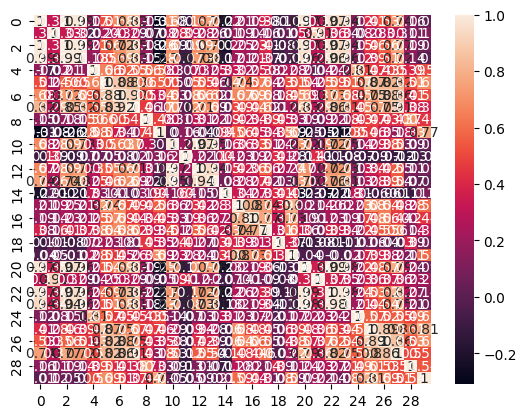

In [226]:
correlation_matrix = X.corr().round(2)
# annot = True to print the values inside the square
sn.heatmap(data=correlation_matrix, annot=True)

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.30, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_train)

(398, 30)
(171, 30)
(398,)
(171,)
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0
 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1]


In [228]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train, Y_train)
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.22817108093507243
R2 score is 0.7783108675080304




In [230]:
# model evaluation for testing set
Y_pred = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# model evaluation for testing set
print(Y_pred.shape)
Y_pred

pd.DataFrame(Y_pred,Y_test)

The model performance for testing set
--------------------------------------
RMSE is 0.2471775150359638
R2 score is 0.735642304718755
(171,)


,0
0,0.674203
0,0.250156
1,1.065958
0,0.182865
1,1.122211
...,...
0,0.145218
1,1.154089
1,0.893565
1,0.910465


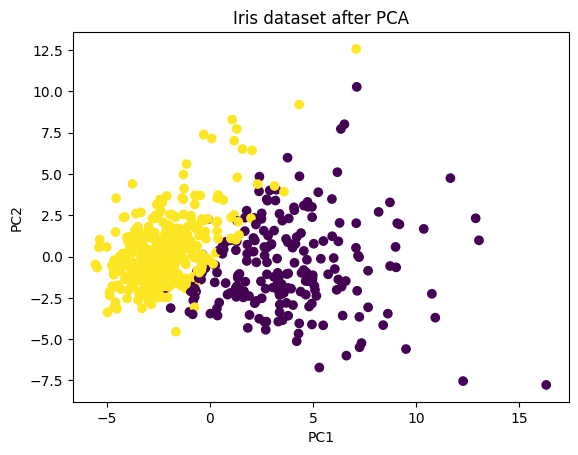

Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135]


In [231]:

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize PCA model
pca = PCA(n_components=4)

# Fit and transform data
X_pca = pca.fit_transform(X_std)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y+1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris dataset after PCA')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [232]:
X_pca.shape

(569, 4)

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split( X_pca, y, test_size=0.30, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_train)

(398, 4)
(171, 4)
(398,)
(171,)
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0
 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1]


In [234]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.2708734948782267
R2 score is 0.6875674837138712




In [235]:
Y_pred = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# model evaluation for testing set
print(Y_pred.shape)
Y_pred

pd.DataFrame(Y_pred,Y_test)

The model performance for testing set
--------------------------------------
RMSE is 0.25777807147461257
R2 score is 0.7124813809428769
(171,)


,0
0,0.522157
0,0.227457
1,0.990962
0,0.374873
1,0.836976
...,...
0,0.173651
1,1.029041
1,0.962344
1,0.983921


In [236]:
# Generate random data
X = np.random.rand(100, 10)

# Initialize PCA model
pca = PCA(n_components=2)

# Fit and transform data
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.14714458 0.13879469]
